# Импорт датасета

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/ivan/Downloads/data.csv", sep=';')

# Приступлю к EDA

Гляну на данные

In [3]:
print(f"В датасете {df.shape[0]} строк, {df.shape[1]} столбцов")

В датасете 3322 строк, 6 столбцов


In [4]:
df.head(10)  

,Показатель,Отдел,Вид,Период,Значение_1,Значение_2
0,А_07,ПОДРАЗДЕЛЕНИЕ 1,СЕРВИС 1,31.01.2019,"0,843","0,020"
1,А_07,ПОДРАЗДЕЛЕНИЕ 1,СЕРВИС 1,28.02.2019,"0,843","0,009"
2,А_07,ПОДРАЗДЕЛЕНИЕ 1,СЕРВИС 1,31.03.2019,"0,932","0,012"
3,А_07,ПОДРАЗДЕЛЕНИЕ 1,СЕРВИС 1,30.04.2019,"0,826","0,005"
4,А_07,ПОДРАЗДЕЛЕНИЕ 1,СЕРВИС 1,31.05.2019,"0,671","0,000"
5,А_07,ПОДРАЗДЕЛЕНИЕ 1,СЕРВИС 1,30.06.2019,"0,697","0,000"
6,А_07,ПОДРАЗДЕЛЕНИЕ 1,СЕРВИС 1,31.07.2019,"1,000","0,038"
7,А_07,ПОДРАЗДЕЛЕНИЕ 1,СЕРВИС 1,31.08.2019,"0,887","0,097"
8,А_07,ПОДРАЗДЕЛЕНИЕ 1,СЕРВИС 1,30.09.2019,"0,897","0,155"
9,А_07,ПОДРАЗДЕЛЕНИЕ 1,СЕРВИС 1,31.10.2019,"0,877","0,221"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Показатель  3322 non-null   object
 1   Отдел       3322 non-null   object
 2   Вид         3322 non-null   object
 3   Период      3322 non-null   object
 4   Значение_1  3318 non-null   object
 5   Значение_2  3319 non-null   object
dtypes: object(6)
memory usage: 155.8+ KB


## Видно, что тип даты object, хорошо бы сделать datetime для работы с датой

In [6]:
df['Период'] = pd.to_datetime(df['Период'], dayfirst=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Показатель  3322 non-null   object        
 1   Отдел       3322 non-null   object        
 2   Вид         3322 non-null   object        
 3   Период      3322 non-null   datetime64[ns]
 4   Значение_1  3318 non-null   object        
 5   Значение_2  3319 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 155.8+ KB


## Для удобства работы лучше переименовать столбцы на английский

In [8]:
ren_map = {
    'Показатель': 'indicator',
    'Отдел':'department',
    'Вид':'category',
    'Период':'period',
    'Значение_1':'value1',
    'Значение_2':'value2'
}
df.rename(columns=ren_map, inplace=True)

In [9]:
df.columns

Index(['indicator', 'department', 'category', 'period', 'value1', 'value2'], dtype='object')

## Интересно какова доля пропусков в данных, ежели имеются

In [10]:
df.isna().sum()/len(df) * 100

indicator     0.000000
department    0.000000
category      0.000000
period        0.000000
value1        0.120409
value2        0.090307
dtype: float64

## А есть ли дубликаты?

In [11]:
df.duplicated().sum()

0

### Отлично, их нет

#  Удалю строки с пропусками данных, так как их доля невелика
Ранее было установлено, что доля пропущенных значений

- value1 пропущено всего 0.12% строк
- value2 пропущено всего 0.09% строк

Поскольку это очень небольшая доля (обычно если пропусков менее 1%, то их удаление не приводит к потере значимых данных и не исказит ничего), можно спокойно убирать строки


In [12]:
df.dropna(inplace=True)
print(f"Размер после удаления строк с пропусками {df.shape}")

Размер после удаления строк с пропусками (3318, 6)


# Извлеку отдельно в столбцы год и месяц, это может пригодиться в будущем

In [13]:
df['year'] = df['period'].dt.year
df['month'] = df['period'].dt.month

In [14]:
df.head()

,indicator,department,category,period,value1,value2,year,month
0,А_07,ПОДРАЗДЕЛЕНИЕ 1,СЕРВИС 1,2019-01-31,"0,843","0,020",2019,1
1,А_07,ПОДРАЗДЕЛЕНИЕ 1,СЕРВИС 1,2019-02-28,"0,843","0,009",2019,2
2,А_07,ПОДРАЗДЕЛЕНИЕ 1,СЕРВИС 1,2019-03-31,"0,932","0,012",2019,3
3,А_07,ПОДРАЗДЕЛЕНИЕ 1,СЕРВИС 1,2019-04-30,"0,826","0,005",2019,4
4,А_07,ПОДРАЗДЕЛЕНИЕ 1,СЕРВИС 1,2019-05-31,"0,671","0,000",2019,5


# Посмотрим на распределение числовых значений

In [15]:
# Просто заменим объекты с запятой во float формат через замену запятой на точку
for col in ['value1', 'value2']:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Проверим статистику
print(df[['value1','value2']].describe())

            value1       value2
count  3318.000000  3318.000000
mean      0.324033     0.272986
std       0.330834     0.314214
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.214000     0.125000
75%       0.590000     0.507000
max       1.000000     1.000000


## Здесь интерсно глянуть, сколько уникальных значений у категориальных признаков и посмотрим на топ 5 самых частых

In [16]:
for col in ['indicator', 'department', 'category']:
    print(f"{col}: {df[col].nunique()} уровней")
    print(df[col].value_counts().head(5), "\n")

indicator: 123 уровней
indicator
А_07    36
Ж_09    36
А_08    36
Ж_16    36
Ж_15    36
Name: count, dtype: int64 

department: 13 уровней
department
ПОДРАЗДЕЛЕНИЕ 2     667
ПОДРАЗДЕЛЕНИЕ 1     579
ПОДРАЗДЕЛЕНИЕ 7     531
ПОДРАЗДЕЛЕНИЕ 5     381
ПОДРАЗДЕЛЕНИЕ 13    272
Name: count, dtype: int64 

category: 123 уровней
category
СЕРВИС 1     36
СЕРВИС 75    36
СЕРВИС 2     36
СЕРВИС 82    36
СЕРВИС 81    36
Name: count, dtype: int64 



1] **indicator** 123 разных показателя. При этом топ-5 по равному числу записей, что говорит о равном распределении метрик

2] **department**: 13 подразделений. Наблюдается разброс частот, есть баланс, но некоторые отделы заметно крупнее других.

3] **category** 123 уровня с равным числом записей (по 36 для топ-5), что опять говорит о том, что каждая категоря рассматривается одинаково по количеству периодов

В целом если делать one-hot encoding в будущем, то высокая вариантивность `indicator` и `category` может негативно сказаться на представлении данных, тк будет слишком много столбцов. Можно будет какую-то часть объединить в одну категорию и уменьшить 123 до 10...


# Посмотрим на разброс данных в боксплоте

In [17]:
import matplotlib.pyplot as plt

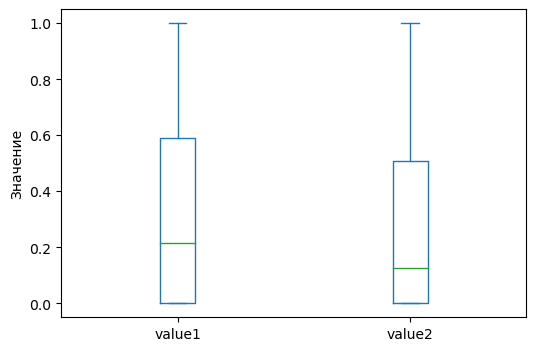

In [18]:
df[['value1','value2']].plot.box(figsize=(6,4))
plt.ylabel('Значение')
plt.show()

> Половина наблюдений у value1 сосредоточено в диапазоне [0; 0.6], у value2 — чуть уже.

> Большая часть значений сосредоточена в нижних диапазонах, при этом есть относительно редкие, но не гигантские выбросы вблизи 1.	

> Особых выбросов нет, регуляризация не требуется и выбросы удалять тоже не надо, много мелких значений без токсичных выбросов. Их можно сразу подавать в модель, я считаю.

## Раз мы говорим о потеницальном применении в модели машинного обучения, то почему бы сразу не закодировать категориальные признаки?

In [19]:
df_final = pd.get_dummies(df,
                          columns=['indicator','department','category'],
                          drop_first=True)
print(f"Shape датасета признаков one-hot encoding {df_final.shape}")

Shape датасета признаков one-hot encoding (3318, 261)


In [20]:
df_final.head(3)

,period,value1,value2,year,month,indicator_А_08,indicator_А_09,indicator_А_10,indicator_А_12,indicator_А_14,...,category_СЕРВИС 90,category_СЕРВИС 91,category_СЕРВИС 92,category_СЕРВИС 93,category_СЕРВИС 94,category_СЕРВИС 95,category_СЕРВИС 96,category_СЕРВИС 97,category_СЕРВИС 98,category_СЕРВИС 99
0,2019-01-31,0.843,0.020,2019,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2019-02-28,0.843,0.009,2019,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2019-03-31,0.932,0.012,2019,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
